Creado por: Sebastian vergara Palacio
año: 2020

Este notebook incluye simulaciones de algunos temas relevantes de física que pueden servir a interpretar los conceptos
sientase libre de modificarlo.


In [ ]:
#Importaciones 
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import clear_output
from time import sleep
import matplotlib.gridspec as gridspec
from scipy.integrate import odeint
import math
import matplotlib.animation as animation
from celluloid import Camera

In [2]:
%matplotlib notebook

In [3]:
import imageio #para hacer imagenes animadas 
from pathlib import Path #para leer las imagenes

# Movimiento periódico

## Posición, velocidad y aceleración de un M.A.S

In [4]:
tiempos= np.linspace(0,20,75) #de 0 a 20 segundos, 200 puntos

A=5 #amplitud del movimiento
k= 2 #constante del resorte [N/m]
m= 5 # masa del cuerpo atado al resorte [kg]
w=np.sqrt(k/m) #frecuencia angular [rad/s]
phi= 0 #angulo inicial [rad]


x= A*np.cos(w*tiempos + phi) #posición
v= -A*w*np.sin(w*tiempos + phi) #velocidad
a= -A*(w**2)*np.cos(w*tiempos + phi) #aceleración

zeros=np.zeros(len(tiempos))


In [5]:
p=(2*np.pi) /w #Periodo del sistema [s]
numerodeperiodos=int(np.max(tiempos)/p)
aux2=int(len(tiempos)/numerodeperiodos)
movimientomasa=[]
for j in range(int(numerodeperiodos)):
    movimientomasa=np.concatenate((movimientomasa,x[aux2*j:aux2*(j+1)]),axis=0)

aux=np.zeros(len(movimientomasa))


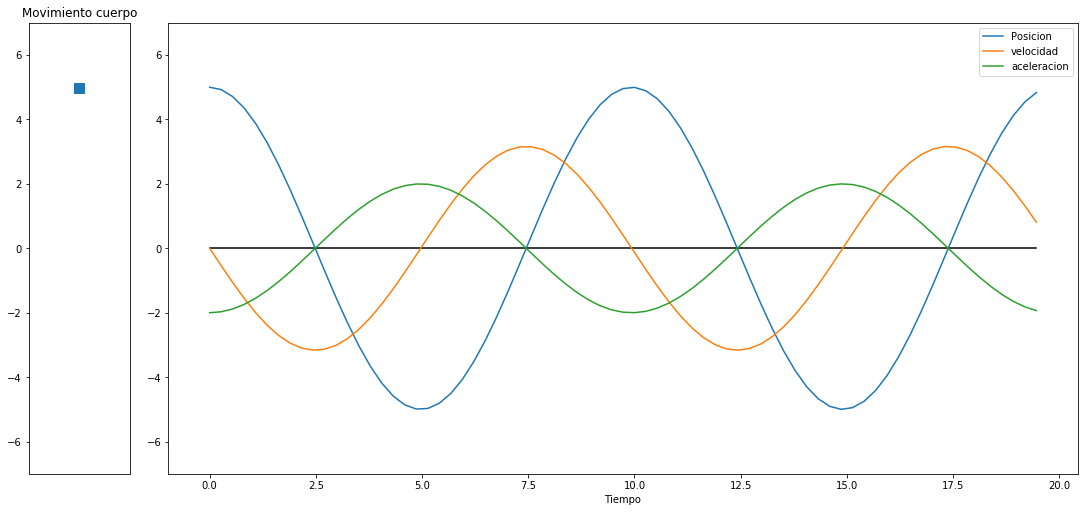

In [10]:



for j in range(len(tiempos)-1):
    #fig= plt.figure(figsize=(15,7))
    clear_output(wait=True)
    fig2 = plt.figure(constrained_layout=True,figsize=(15,7))
    spec2 = gridspec.GridSpec(ncols=6, nrows=4, figure=fig2)
    f2_ax1 = fig2.add_subplot(spec2[:, 0])
    f2_ax2 = fig2.add_subplot(spec2[:, 1:])
    f2_ax1.scatter(aux[j],movimientomasa[j],s=100,marker='s')
    f2_ax1.set_xticks([])
    f2_ax1.set_ylim([-A-2,A+2])
    f2_ax1.set_title('Movimiento cuerpo')
    
    f2_ax2.plot(tiempos[0:j],zeros[0:j],c='k')
    f2_ax2.plot(tiempos[0:j],x[0:j],label='Posicion')
    f2_ax2.plot(tiempos[0:j],v[0:j],label='velocidad')
    f2_ax2.plot(tiempos[0:j],a[0:j],label='aceleracion')
    f2_ax2.set_ylim([-A-2,A+2])
    f2_ax2.set_xlabel('Tiempo')
    f2_ax2.legend()

    plt.show()
    sleep(0.3)




## Analisis de la dependencia del periodo con la masa y la constante del resorte

La posición de un oscilador armónico en función del tiempo esta descrita por:

$\begin{equation}
X(t)= Acos(wt)=Acos(\sqrt{\frac{k}{m}}t)
\end{equation}$

Veamos como cambia el periodo del sistema cuando se varia la masa o la constante de elasticidad

In [162]:
#Intenta cambiar los valores de k y m (no modifiques masa_fija y k_fija)

k=[1,4] #contante de resorte N/m
masa_fija=2
k_fija=3
m=[1,4] #masa del cuerpo
A= 4 #amplitud del movimiento

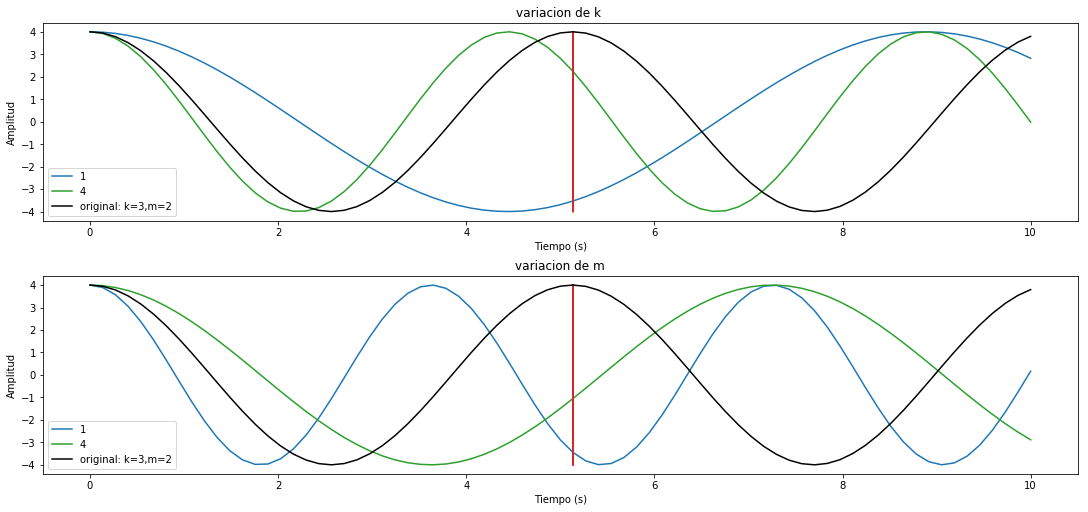

In [163]:
tiempos= np.linspace(0,10,75) #de 0 a 20 segundos, 75 puntos

w_fija=np.sqrt(k_fija/masa_fija) #frecuencia original
w_k=np.sqrt(k/(np.full(len(k),masa_fija))) #frecuencia angular [rad/s] con variacion de k
w_masa=np.sqrt((np.full(len(m),k_fija))/m) #frecuencia angular [rad/s] con variacion de la masa
phi= 0 #angulo inicial [rad]
p=(2*np.pi) /w_fija #Periodo del sistema [s]
numerodeperiodos=int(np.max(tiempos)/p)
fig2 = plt.figure(constrained_layout=True,figsize=(15,7))
spec2 = gridspec.GridSpec(ncols=4, nrows=4, figure=fig2)
for j in range(len(k)):
    

    f2_ax1 = fig2.add_subplot(spec2[0:2,: ])
    f2_ax1.set_title('variacion de k ')
    f2_ax2 = fig2.add_subplot(spec2[2:,: ])
    f2_ax2.set_title('variacion de m')
    
    
    f2_ax1.plot(tiempos,A*np.cos(w_k[j]*tiempos + phi),label=k[j])
    f2_ax1.plot(np.full(len(tiempos),p),A*np.cos(w_k[j]*tiempos + phi),'--')
    f2_ax1.set_xlabel('Tiempo (s)')
    f2_ax1.set_ylabel('Amplitud')
    
    
    
    f2_ax2.plot(tiempos,A*np.cos(w_masa[j]*tiempos + phi),label=m[j])
    f2_ax2.plot(np.full(len(tiempos),p),A*np.cos(w_k[j]*tiempos + phi),'--')
    f2_ax2.set_xlabel('Tiempo (s)')
    f2_ax2.set_ylabel('Amplitud')
    
f2_ax1.plot(tiempos,A*np.cos(w_fija*tiempos + phi),label='original: k=3,m=2',c='k')
f2_ax2.plot(tiempos,A*np.cos(w_fija*tiempos + phi),label='original: k=3,m=2',c='k')
f2_ax1.legend()
f2_ax2.legend()

La linea roja corresponde al periodo del sistema de referencia 

 Podemos observar que si K aumenta el periodo disminuye, pero si por el contrario la masa aumenta el periodo aumentará.En todo momento la amplitud permancece constante

## Energía del movimiento armonico simple:

La energía mecánica de un sistema masa resorte ideal se conserva. Es constante:


$\begin{equation}
E= K + U = \frac{1}{2}mv^2 + \frac{1}{2}kx^2
\end{equation}$

La velocidad en los extremos del movimiento es igual a cero por lo que no hay energía cinética y la energía potencial es máxima. Por otro lado, la energía cinética en la posición de equilibrio es máxima y la energía potencial elastica es cero (no hay deformación)

In [4]:
A=5 #amplitud del movimiento
k= 2 #constante del resorte [N/m]
m= 5 # masa del cuerpo atado al resorte [kg]
w=np.sqrt(k/m) #frecuencia angular [rad/s]
phi= 0 #angulo inicial [rad]

In [5]:
tiempos= np.linspace(0,20,75) #de 0 a 20 segundos, 75 puntos




x= A*np.cos(w*tiempos + phi) #posición
v= -A*w*np.sin(w*tiempos + phi) #velocidad
a= -A*(w**2)*np.cos(w*tiempos + phi) #aceleración

E=(1/2)*m*v**2 + (1/2)*k*x**2 #la energia mecanica en funcion de la posicion y velocidad
k_cine= (1/2)*m*v**2 #Energia cinetica
U_el= (1/2)*k*x**2 #energía potencial elastica 
zeros=np.zeros(len(tiempos))
p=(2*np.pi) /w #Periodo del sistema [s]
numerodeperiodos=int(np.max(tiempos)/p)
aux2=int(len(tiempos)/numerodeperiodos)
movimientomasa=[]
for j in range(int(numerodeperiodos)):
    movimientomasa=np.concatenate((movimientomasa,x[aux2*j:aux2*(j+1)]),axis=0)

aux=np.zeros(len(movimientomasa))

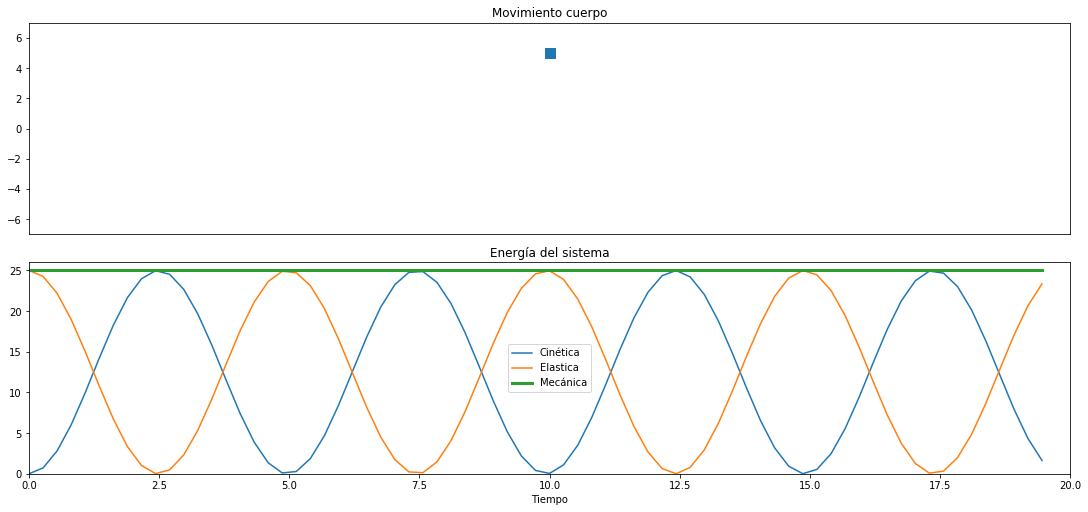

In [6]:


for j in range(len(tiempos)-1):
    #fig= plt.figure(figsize=(15,7))
    clear_output(wait=True)
    fig2 = plt.figure(constrained_layout=True,figsize=(15,7))
    spec2 = gridspec.GridSpec(ncols=6, nrows=4, figure=fig2)
    f2_ax1 = fig2.add_subplot(spec2[:2, :])
    f2_ax2 = fig2.add_subplot(spec2[2:, :])
    f2_ax1.scatter(aux[j],movimientomasa[j],s=100,marker='s')
    f2_ax1.set_xticks([])
    f2_ax1.set_ylim([-A-2,A+2])
    f2_ax1.set_title('Movimiento cuerpo')
    
    
    f2_ax2.plot(tiempos[0:j],k_cine[0:j],label='Cinética')
    f2_ax2.plot(tiempos[0:j],U_el[0:j],label='Elastica')
    f2_ax2.plot(tiempos[0:j],E[0:j],label='Mecánica',linewidth=3)
    f2_ax2.set_ylim([0,(1/2)*k*A**2 +1])
    f2_ax2.set_xlim([0,np.max(tiempos)])
    f2_ax2.set_xlabel('Tiempo')
    f2_ax2.set_title('Energía del sistema')
    f2_ax2.legend()

    plt.show()
    #sleep(0.00001)


## El pendulo simple:
Un sistema formado por una masa puntual y una cuerda inextensible y de masa despreciable cumplen las condiciones para ser un movimiento armonico simple (M.A.S), $\textbf{Solo si las oscilaciones son pequeñas:}$ $\theta< 15$

In [4]:
#creo la ecuación diferencial que gobierna el movimiento del pendulo simple
def pendulo_simple(theta,t,b,g,l,m):
    "los parametros de la función son el angulo(theta), la constante de amortiguamiento b, la gravedad g"
    "la longitud de la cuerda l y la masa del cuerpo m"
    "la ecuación es d^2theta/dt^2 + (b/m)dtheta/dt + (g/l)sen( theta) = 0"
    theta_1=theta[0]
    theta_2=theta[1] #theta_1 y theta_2 corresponden a las condiciones iniciales del sistema: 
                     #Posicion y velocidad
    dtheta_1dt=theta_2
    dtheta_2dt= -(b/m)*theta_2 - (g/l)*theta_1 #np.sin(theta_1) este es el termino original
    dtheta_dt= [dtheta_1dt,dtheta_2dt]
    return dtheta_dt

Crea el sistema: masa del péndulo, longitud de cuerda, planeta (gravedad), condiciones iniciales.
Las condiciones iniciales de referencia son: l=0.5 m, m=0.5 kg, g=9.8 m/s^2 b=0.

Varia las condiciones del otro pendulo para ver que sucede

In [5]:
l_prue=1 #m
m_prue=2 #kg
g_prue=9.8 #m/s^2
b_prue=0 #amortiguamiento


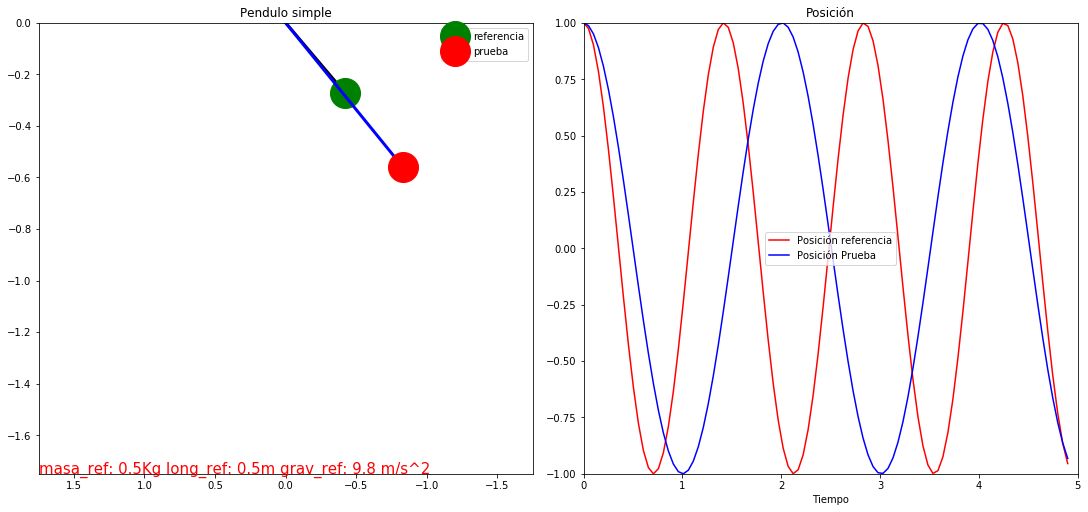

Frecuencia referencia: 6.954211786057271  Hz
Frecuencia : 4.917370311728508  Hz


In [13]:
l=0.5 #m
m=0.5 #kg
g=9.8 #m/s^2
b=0 #amortiguamiento
theta_inicial=[1,0] #condiciones iniciales, posición velocidad
theta_inicial_prue=[1,0] #condiciones iniciales, posición velocidad
tiempos= np.linspace(0,5,100) #de 0 a 10 segundos, 200 puntos
theta=odeint(pendulo_simple,theta_inicial,tiempos,args=(b,g,l,m)) #resuelve la ecuación diferencial
theta_prue=odeint(pendulo_simple,theta_inicial_prue,tiempos,args=(b_prue,g_prue,l_prue,m_prue))
ylim_inf=- np.maximum( (np.max(np.abs(theta[:,0])) +1.5*(l)), (np.max(np.abs(theta_prue[:,0])) +1.5*(l)) )
xlim_prue=np.sqrt(g_prue/l_prue)*(l+1/8)
xlim=np.sqrt(g/l)*(l+1/8)
y_lim_theta= np.maximum(np.max(theta_prue[:,0]),np.max(theta[:,0]))

text='masa_ref: ' + np.str(m) +'Kg ' + 'long_ref: ' + np.str(l) + 'm '+ 'grav_ref: ' + np.str(g) +' m/s^2'

for j in range(len(tiempos)-1):
    print('Frecuencia referencia:', (1/2*np.pi)*(np.sqrt(g/l)), ' Hz')
    print('Frecuencia :', (1/2*np.pi)*(np.sqrt(g_prue/l_prue)), ' Hz')
    clear_output(wait=True)
    fig2 = plt.figure(constrained_layout=True,figsize=(15,7))
    spec2 = gridspec.GridSpec(ncols=6, nrows=4, figure=fig2)
    f2_ax1 = fig2.add_subplot(spec2[:, :3])
    f2_ax2 = fig2.add_subplot(spec2[:, 3:])
    
    f2_ax1.plot([0,l*np.sin(theta[j,0])],[0, -l*np.cos(theta[j,0])],color='k',linewidth=3) #Grafica la cuerda
    f2_ax1.plot(l*np.sin(theta[j,0]),-l*np.cos(theta[j,0]),'o',markersize=30,color='g',label='referencia') #grafica la masa
    
    f2_ax1.plot([0,l_prue*np.sin(theta_prue[j,0])],[0, -l_prue*np.cos(theta_prue[j,0])],color='b',linewidth=3) #Grafica la cuerda prueba
    f2_ax1.plot(l_prue*np.sin(theta_prue[j,0]),-l_prue*np.cos(theta_prue[j,0]),'o',markersize=30,color='r',label='prueba') #grafica la masa prueba
    f2_ax1.text(-ylim_inf,ylim_inf,text,fontsize=15,color='r')
    f2_ax1.legend()
    
    #f2_ax1.set_xticks([])
    f2_ax1.set_ylim([ylim_inf,0*(np.max(np.abs(theta[j,0])) +1.5*l)])
    f2_ax1.set_xlim([-ylim_inf,ylim_inf])
    f2_ax1.set_title('Pendulo simple')
    f2_ax2.plot(tiempos[:j], theta[:j,0],label='Posición referencia',color='r')
    f2_ax2.plot(tiempos[:j], theta_prue[:j,0],label='Posición Prueba',color='b')
    f2_ax2.set_ylim([-y_lim_theta,y_lim_theta])
    f2_ax2.set_xlim([0,np.max(tiempos)])
    f2_ax2.set_xlabel('Tiempo')
    f2_ax2.set_title('Posición')
    f2_ax2.legend()
    
    plt.show()
    
print('Frecuencia referencia:', (1/2*np.pi)*(np.sqrt(g/l)), ' Hz')
print('Frecuencia :', (1/2*np.pi)*(np.sqrt(g_prue/l_prue)), ' Hz')


## Oscilaciones amortiguadas

En un sistema oscilatorio no ideal la energía mecánica no se conserva. Esto es debido a fuerzas disipadoras. A esto se le llama $\textbf{amortiguamiento}$ y el movimiento recibe el nombre de $\textbf{Oscilación amortiguada}$

una fuerza de amortiguamiento puede ser del tipo F=-bV donde b es la constante que describe la intensidad del amortiguamiento y V es la velocidad del sistema.

De esta manera la ecuación diferencial del sistema es:

$\begin{equation}
kx +b\frac{dx}{dt} + m\frac{md^2 x}{dt^2}=0
\end{equation}$

Si la fuerza de amortiguamiento es pequeña la solución de la ecuación es:


$\begin{equation}
X= A e^{-(b/2m)t}cos(w't + \phi)
\end{equation}$

In [4]:
#creo la ecuación diferencial que gobierna el movimiento amortiguado
def movi_amortiguado(X,t,b,k,m):

    x_1=X[0]
    x_2=X[1] #x_1 y x_2 corresponden a las condiciones iniciales del sistema: 
                     #Posicion y velocidad
    dx_1dt=x_2
    dx_2dt= -(b/m)*x_2 - (k/m)*x_1 
    dx_dt= [dx_1dt,dx_2dt]
    return dx_dt

Crea tu propio sistema y mira como cambia con respecto al sistema de referencia cuando varias los parametros.
Sistema de referencia: m=0.5 kg, k=5 N/m, b=0.5

In [22]:
m_prue=2
k_prue=5
b_prue=0.5

<IPython.core.display.Javascript object>


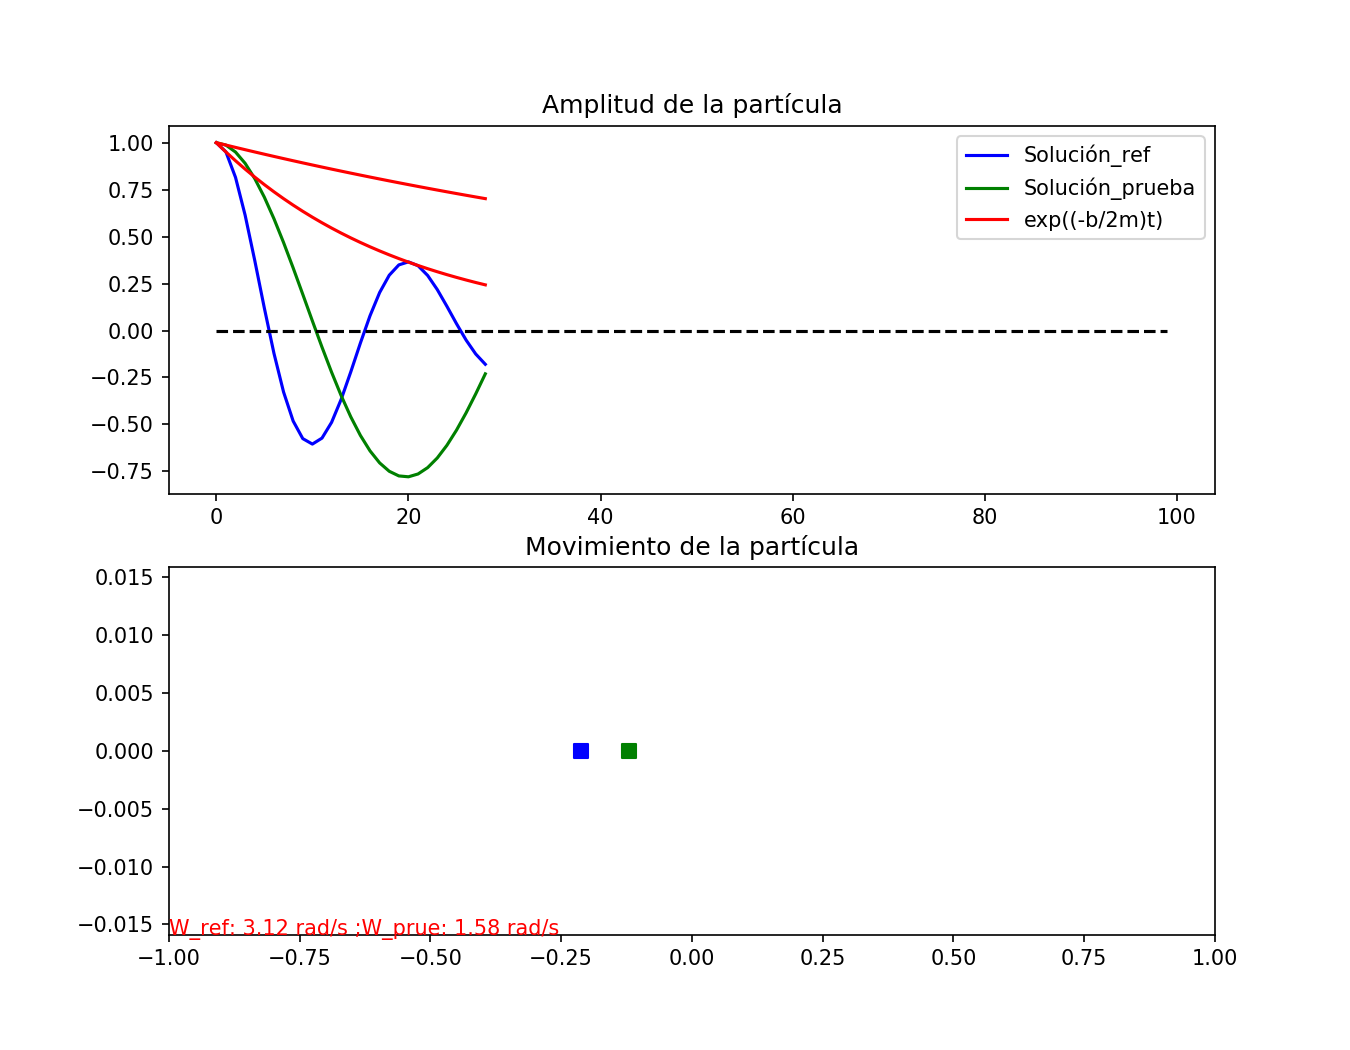

b_prueba:  0.5  2(k*m)^(1/2)=  6.32


In [23]:
m=0.5 #kg
k=5 #N/m
b=0.5 #amortiguamiento
x_inicial=[1,0] #condiciones iniciales, posición velocidad
tiempos= np.linspace(0,10,100) #de 0 a 10 segundos, 200 puntos
x=odeint(movi_amortiguado,x_inicial,tiempos,args=(b,k,m)) #resuelve la ecuación diferencial
x_prue=odeint(movi_amortiguado,x_inicial,tiempos,args=(b_prue,k_prue,m_prue)) #resuelve la ecuación diferencial
envolvente= x_inicial[0]*np.exp(-(b/(2*m))*tiempos)
envolvente_prue=x_inicial[0]*np.exp(-(b_prue/(2*m_prue))*tiempos)
zeros=np.zeros(len(tiempos))
w=round(np.sqrt((k/m)-(b**2 / (4*m**2))),2)
w_ref=round(np.sqrt((k_prue/m_prue)-(b_prue**2 / (4*m_prue**2))),2)
text='W_ref: ' + np.str(w) + ' rad/s'+' ;W_prue: ' + np.str(w_ref) + ' rad/s'
fig, axes = plt.subplots(2,figsize=(9,7))

print('b_prueba: ', b_prue, ' 2(k*m)^(1/2)= ', 2*round(np.sqrt(k_prue*m_prue),2))
camera = Camera(fig)
for i in range(len(x)-1):
    axes[0].plot(x[:i,0],color='b')
    axes[0].plot(x_prue[:i,0],color='g')
    axes[0].plot(envolvente[:i],color='r')
    axes[0].plot(envolvente_prue[:i],color='r')
    axes[0].plot(np.arange(len(tiempos)),zeros[:],'--',color='k')
    axes[0].set_title('Amplitud de la partícula')
    axes[1].scatter(x[i:i+1,0],0*np.sin(x[i:i+1,0]),marker='s',color='b',s=50)
    axes[1].scatter(x_prue[i:i+1,0],0*np.sin(x[i:i+1,0]),marker='s',color='g',s=50)
    axes[1].set_title('Movimiento de la partícula')
    axes[1].set_xlim([-x_inicial[0],x_inicial[0]])
    axes[1].text(0,0,text,fontsize=10,color='r', transform=axes[1].transAxes)
    axes[0].legend(['Solución_ref','Solución_prueba','exp((-b/2m)t)'])
    camera.snap()
animation = camera.animate()


## Oscilaciones forzadas y resonancia

Sucede cuando a un sistema en oscilación se le excita con una fuerza externa. En esta ocasión consideraremos el caso de una fuerza externa periodica que manteniene el sistema en oscilación. Dicha fuerza es del tipo:

$\begin{equation}
F=F_a Cos(w_d t + \phi)
\end{equation}$

Ahora la frecuencia con que oscila el sistema no corresponde a su frecuencia natural sino al de la fuerza externa

Miremos como varia la amplitud de un movimiento amortiguado en presencia de una fuerza impulsora.

$\begin{equation}
A = \frac{F_a}{\sqrt{(k-mw_d^2)^2 + b^2 w_d^2}}
\end{equation}$

<IPython.core.display.Javascript object>


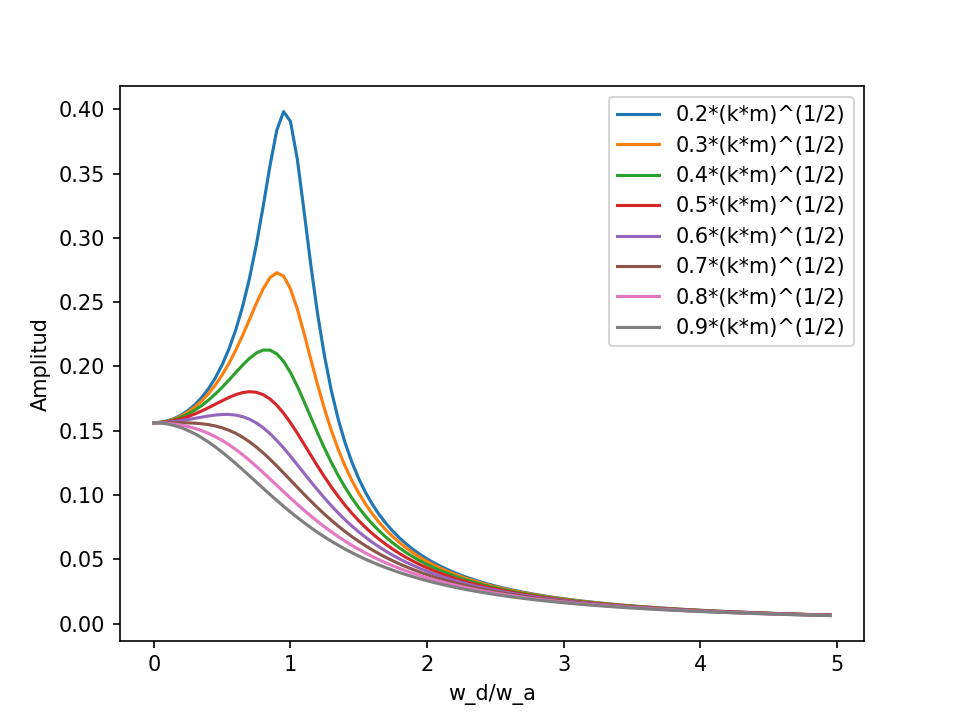

In [144]:
#Defino mi sistema
k=8#N/m
m=2 #2kg
factor=np.sqrt(k*m)
b=factor*np.arange(0.2,1,0.1)
w_na=np.sqrt(k/m) #Frecuencia natural del sistema
w_d=np.arange(0,10,0.1) #rad/s frecuencia de la fuerza externa
F_a= 5 #amplitud de la fuerza impulsora
cociente=w_d/w_na
auc=np.arange(0.2,1,0.1)
fig=plt.figure()
plt.xlabel('w_d/w_a')
plt.ylabel('Amplitud')
for j in range(len(b)):
    A=(F_a/w_na**4) /(np.sqrt(((k/w_na**2) -m*(cociente)**2)**2  + ((b[j]**2)*(cociente)**2) ))
    plt.plot(cociente, A,label=np.array2string(auc[j]) + '*(k*m)^(1/2)')
    plt.legend()

* ¿Que sucede cuando b aumenta o disminuye?
* ¿En donde la amplitu del movimiento siempre es mayor? ¿Por qué?
* Varie las constantes del sistema

# Ondas mecánicas

'['